# First break picking datasets

* [Dataset 1](#Dataset-1)   
* [Dataset 2](#Dataset-2)   
* [Dataset 3](#Dataset-3)  

## Dataset 1

Dataset consists of a raw field seismograms and corresponding first break pickings.   
Dataset is split into training and validation parts.

**Train**

| Filename | About this file | Size | N ffid | Length |
| :------ | ----: | ----: | ----: | ----: |
| Pal_Flatiron_1k.sgy | Raw field seismogram | 2.5 Gb | 1001 | 1.4 s |
| Pal_Flatiron_1k_picking.csv | First break time | 16 Mb | 1001 | - |

**Validation**

| Filename | About this file | Size | N ffid | Length |
| :------ | ----: | ----: | ----: | ----: |
| Pal_Flatiron_1k_val.sgy | Raw field seismogram | ? | ? | ? |
| Pal_Flatiron_1k_val_picking.csv | First break time | ? | ? | - |

In [1]:
import sys
sys.path.append('..')

from seismicpro.src import (SeismicDataset, FieldIndex, TraceIndex,
                            seismic_plot)

Define the index.

In [2]:
path_raw = '/data/FB/dataset_1/Pal_Flatiron_1k.sgy'
markup_path='/data/FB/dataset_1/Pal_Flatiron_1k_picking.csv'

index = (FieldIndex(name='raw', path=path_raw, markup_path=markup_path))

index.head()

,TraceNumber,FIRST_BREAK_TIME,TRACE_SEQUENCE_FILE,file_id
,,,raw,raw
FieldRecord,,,,
10407,1956,77.291588,1,/data/FB/dataset_1/Pal_Flatiron_1k.sgy
10407,1957,75.197472,2,/data/FB/dataset_1/Pal_Flatiron_1k.sgy
10407,1955,95.463326,3,/data/FB/dataset_1/Pal_Flatiron_1k.sgy
10407,1958,96.654495,4,/data/FB/dataset_1/Pal_Flatiron_1k.sgy
10407,1954,114.333763,5,/data/FB/dataset_1/Pal_Flatiron_1k.sgy


Total number of field records and traces:

In [3]:
len(index), sum(index.tracecounts)

(1001, 753667)

Number of traces in Field Records varies in range:

In [4]:
df = TraceIndex(index)._idf
df.groupby(by=['FieldRecord']).size().min(), df.groupby(by=['FieldRecord']).size().max()

(381, 850)

Sample seismogram and picking.

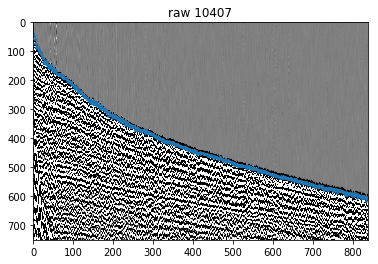

In [5]:
cv = 1000
batch = (SeismicDataset(index).next_batch(batch_size=1)
         .load(components='raw', fmt='segy')
         .load(components='markup', fmt='picks')
         .seismic_plot(src='raw', index=index.indices[0], cmap='gray', vmin=-cv, vmax=cv, s=3,
                       src_picking='markup'))

## Dataset 2

Dataset consists of a raw field seismograms and corresponding first break pickings.   
Dataset is split into training and validation parts.

In this dataset only traces with **offset < 1400** have labels.

**Train**

| Filename | About this file | Size | N ffid | Length |
| :------ | ----: | ----: | ----: | ----: |
| WZ_Flatiron_1k.sgy | Raw field seismogram | 2.4 Gb | 1001 | 1.4 s |
| WZ_Flatiron_1k_picking.csv | First break time | 16 Mb | 1001 | - |

**Validation**

| Filename | About this file | Size | N ffid | Length |
| :------ | ----: | ----: | ----: | ----: |
| WZ_Flatiron_1k_val.sgy | Raw field seismogram | ? | ? | ? |
| WZ_Flatiron_1k_val_picking.csv | First break time | ? | ? | - |

Below we show sample trace headers and sample seismogram with picking from the train dataset.   
Sample trace headers:

Define index.

In [6]:
path_raw = '/data/FB/dataset_2/WZ_Flatiron_1k.sgy'
markup_path='/data/FB/dataset_2/WZ_Flatiron_1k_picking.csv'

index = (FieldIndex(name='raw', path=path_raw, markup_path=markup_path))

index.head()

,TraceNumber,FIRST_BREAK_TIME,TRACE_SEQUENCE_FILE,file_id
,,,raw,raw
FieldRecord,,,,
3125,448,67.0,1,/data/FB/dataset_2/WZ_Flatiron_1k.sgy
3125,447,82.0,2,/data/FB/dataset_2/WZ_Flatiron_1k.sgy
3125,446,112.0,3,/data/FB/dataset_2/WZ_Flatiron_1k.sgy
3125,445,137.0,4,/data/FB/dataset_2/WZ_Flatiron_1k.sgy
3125,392,172.0,5,/data/FB/dataset_2/WZ_Flatiron_1k.sgy


Total number of field records and traces:

In [7]:
len(index), sum(index.tracecounts)

(1001, 426608)

Number of traces in Field Records varies in range:

In [8]:
df = TraceIndex(index)._idf
df.groupby(by=['FieldRecord']).size().min(), df.groupby(by=['FieldRecord']).size().max()

(216, 454)

Sample seismogram and picking.

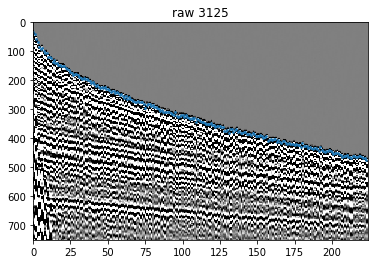

In [9]:
batch = (SeismicDataset(index).next_batch(batch_size=1)
         .load(components='raw', fmt='segy')
         .load(components='markup', fmt='picks')
         .seismic_plot(src='raw', index=index.indices[0], cmap='gray',vmin=-1,vmax=1, s=3,
                       src_picking='markup'))

In this dataset only traces with offsets < 1400 have labels.

## Dataset 3

Dataset consists of a raw field seismograms and corresponding first break pickings.   
Dataset is split into training and validation parts.

**Train**

| Filename | About this file | Size | N ffid | Length |
| :------ | ----: | ----: | ----: | ----: |
| 3_FBP_1k-ffid_3s.sgy | Raw field seismogram | 2.4 Gb | 460 | 2.9 s |
| 3_FBP_1k-ffid_3s.sgy_picking.csv | First break time | 10 Mb | 460 | - |

**Validation**

| Filename | About this file | Size | N ffid | Length |
| :------ | ----: | ----: | ----: | ----: |
| 3_FBP_1k-ffid_3s_val.sgy | Raw field seismogram | ? | ? | ? |
| 3_FBP_1k-ffid_3s.sgy_val_picking.csv | First break time | ? | ? | - |

Below we show sample trace headers and sample seismogram with picking from the train dataset.   
Sample trace headers:

In [10]:
path_raw = '/data/FB/dataset_3/3_FBP_1k-ffid_3s.sgy'
markup_path='/data/FB/dataset_3/3_FBP_1k-ffid_3s_picking.csv'

index = (FieldIndex(name='raw', path=path_raw, markup_path=markup_path))

index.head()

,TraceNumber,FIRST_BREAK_TIME,TRACE_SEQUENCE_FILE,file_id
,,,raw,raw
FieldRecord,,,,
143033,1141,96,1,/data/FB/dataset_3/3_FBP_1k-ffid_3s.sgy
143033,1140,83,2,/data/FB/dataset_3/3_FBP_1k-ffid_3s.sgy
143033,1139,133,3,/data/FB/dataset_3/3_FBP_1k-ffid_3s.sgy
143033,1142,171,4,/data/FB/dataset_3/3_FBP_1k-ffid_3s.sgy
143033,1138,166,5,/data/FB/dataset_3/3_FBP_1k-ffid_3s.sgy


Total number of field records and traces:

In [11]:
len(index), sum(index.tracecounts)

(460, 61857)

Number of traces in Field Records varies in range:

In [12]:
df = TraceIndex(index)._idf
df.groupby(by=['FieldRecord']).size().min(), df.groupby(by=['FieldRecord']).size().max()

(129, 140)

Sample seismogram and picking.

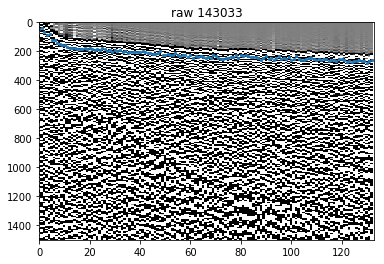

In [13]:
batch = (SeismicDataset(index).next_batch(batch_size=10)
         .load(components='raw', fmt='segy')
         .load(components='markup', fmt='picks')
         .seismic_plot(src='raw', index=index.indices[0], cmap='gray',vmin=-100,vmax=100, s=5,
                       src_picking='markup'))